In [1]:
#Python
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

concrete = pd.read_csv("data/concrete+slump+test/slump_test.data")
concrete.rename(columns={'No':'id', 
                         'Compressive Strength (28-day)(Mpa)':'Comp_Strength',
                         'FLOW(cm)': 'Flow'},
                inplace=True)
lm_flow_water = ols('Flow ~ Water', data=concrete).fit()
print(lm_flow_water.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     67.18
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           8.10e-13
Time:                        06:08:32   Log-Likelihood:                -414.60
No. Observations:                 103   AIC:                             833.2
Df Residuals:                     101   BIC:                             838.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -58.7276     13.286     -4.420      0.0

In [3]:
#Python
bike2 = pd.read_csv("data/bike2.csv")
bike2_sub = bike2[bike2.workingday == "no"]

lm_reg_casual = ols('registered ~ casual', bike2_sub).fit()
anova_tab = sm.stats.anova_lm(lm_reg_casual,)
anova_tab

,df,sum_sq,mean_sq,F,PR(>F)
casual,1.0,2.376546e+08,2.376546e+08,369.251728,1.183368e-49
Residual,229.0,1.473870e+08,6.436112e+05,NaN,NaN


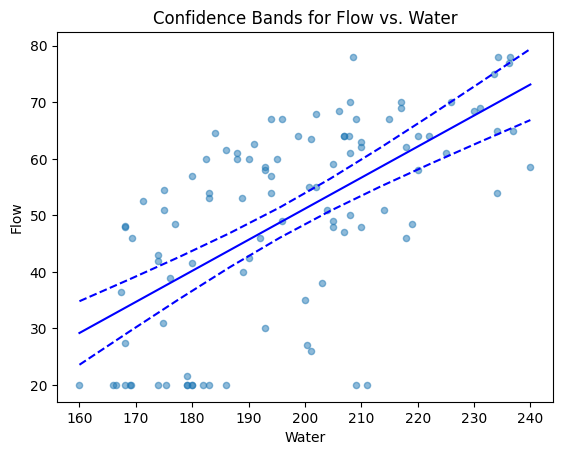

In [4]:
#| fig-align: center
#| fig-cap: "Py: Confidence intervals flow versus water"
# Python
new_df = sm.add_constant(pd.DataFrame({'Water' : np.linspace(160,240, 10)}))

predictions_out = lm_flow_water.get_prediction(new_df)

ax = concrete.plot(x='Water', y='Flow', kind='scatter', alpha=0.5 )
ax.set_title('Confidence Bands for Flow vs. Water');
ax.plot(new_df.Water, predictions_out.conf_int()[:, 0].reshape(-1), 
        color='blue', linestyle='dashed');
ax.plot(new_df.Water, predictions_out.conf_int()[:, 1].reshape(-1), 
        color='blue', linestyle='dashed');
ax.plot(new_df.Water, predictions_out.predicted, color='blue');

In [5]:
# Python
lm_flow_water_slag = ols('Flow ~ Water + Slag', data=concrete).fit()
print(lm_flow_water_slag.summary())

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     49.17
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.35e-15
Time:                        06:10:09   Log-Likelihood:                -405.59
No. Observations:                 103   AIC:                             817.2
Df Residuals:                     100   BIC:                             825.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.2666     12.387     -4.058      0.0

In [6]:
# Python
lm_reg_casual2 = ols('registered ~ casual + workingday', bike2).fit()
print(lm_reg_casual2.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     378.7
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          1.81e-113
Time:                        06:10:10   Log-Likelihood:                -6150.8
No. Observations:                 731   AIC:                         1.231e+04
Df Residuals:                     728   BIC:                         1.232e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           605.2254    118.79

In [7]:
# Python
lm_reg_casual3 = ols('registered ~ casual * workingday', bike2).fit()
print(lm_reg_casual3.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     377.5
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          9.38e-148
Time:                        06:10:11   Log-Likelihood:                -6068.3
No. Observations:                 731   AIC:                         1.214e+04
Df Residuals:                     727   BIC:                         1.216e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<Axes: >

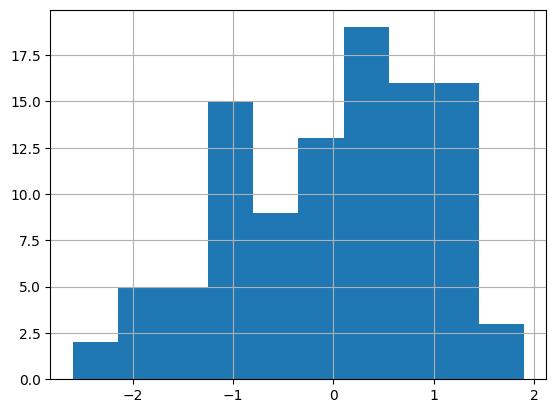

In [9]:
#| fig-align: center
#| fig-cap: "Py: Residual histogram, flow vs. water and slag"
# Python
r_s = pd.Series(lm_flow_water_slag.resid_pearson)
r_s.hist()